In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
identity=pd.read_csv("train_identity.csv")
transaction=pd.read_csv("train_transaction.csv")

In [3]:
print("Shape of train_identity.csv",identity.shape)
print("Shape of train_transaction.csv",transaction.shape)

Shape of train_identity.csv (144233, 41)
Shape of train_transaction.csv (590540, 394)


In [4]:
identity.columns[identity.isnull().any()]

Index(['id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09',
       'id_10', 'id_11', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
       'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [5]:
identity.isnull().sum().sort_values(ascending=False)

id_24            139486
id_25            139101
id_07            139078
id_08            139078
id_21            139074
id_26            139070
id_22            139064
id_27            139064
id_23            139064
id_18             99120
id_04             77909
id_03             77909
id_33             70944
id_10             69307
id_09             69307
id_30             66668
id_32             66647
id_34             66428
id_14             64189
DeviceInfo        25567
id_13             16913
id_16             14893
id_06              7368
id_05              7368
id_20              4972
id_19              4915
id_17              4864
id_31              3951
DeviceType         3423
id_02              3361
id_11              3255
id_28              3255
id_29              3255
id_15              3248
id_35              3248
id_36              3248
id_37              3248
id_38              3248
id_12                 0
id_01                 0
TransactionID         0
dtype: int64

In [6]:
transaction.columns[transaction.isnull().any()]

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=374)

In [7]:
transaction.isnull().sum().sort_values(ascending=False).head()

dist2    552913
D7       551623
D13      528588
D14      528353
D12      525823
dtype: int64

In [8]:
identity.TransactionID.nunique()

144233

In [9]:
transaction.TransactionID.nunique()

590540

In [10]:
%%time
train=transaction.merge(identity,how="left",on="TransactionID")

Wall time: 7.78 s


In [11]:
train.shape

(590540, 434)

In [12]:
#sns.distplot(train.TransactionAmt,bins=20, rug=True);

In [13]:
train.isnull().sum().sort_values(ascending=False).head()

id_24    585793
id_25    585408
id_07    585385
id_08    585385
id_21    585381
dtype: int64

In [14]:
train.TransactionID.isnull().sum()

0

In [15]:
%%time
#Droppong Columns with more than 75% of missing values
drop_columns=[]
for col in train.columns:
    if col not in ["TransactionID","isFraud"] and ((train[col].isnull().sum()*100/train.shape[0])>=75):
        drop_columns.append(col)
    else:
        continue
        

Wall time: 2.93 s


In [16]:
len(drop_columns)

208

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [18]:
train.memory_usage(deep=True).sum()

2710545564

In [19]:
%%time
train.drop(columns=drop_columns,inplace=True)

Wall time: 667 ms


In [20]:
train.memory_usage(deep=True).sum()

1406565832

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 226 entries, TransactionID to V321
dtypes: float64(209), int64(4), object(13)
memory usage: 1022.7+ MB


In [22]:
train.shape

(590540, 226)

In [23]:
def get_categories(df):
    column_list=df.columns[df.isnull().sum()>0]
    categorical_columns={}
    for col in column_list:
        if(df[col].nunique()>20):
            continue
        else:
            categorical_columns[col]=df[col].nunique()
    for col in categorical_columns.keys():
        print(df.groupby(col).size())
        print("\n")
    return categorical_columns
    

In [24]:
%%time
categorical_columns=get_categories(train)

card4
american express      8328
discover              6651
mastercard          189217
visa                384767
dtype: int64


card6
charge card            15
credit             148986
debit              439938
debit or credit        30
dtype: int64


M1
F        25
T    319415
dtype: int64


M2
F     33972
T    285468
dtype: int64


M3
F     67709
T    251731
dtype: int64


M4
M0    196405
M1     52826
M2     59865
dtype: int64


M5
F    132491
T    107567
dtype: int64


M6
F    227856
T    193324
dtype: int64


M7
F    211374
T     32901
dtype: int64


M8
F    155251
T     89037
dtype: int64


M9
F     38632
T    205656
dtype: int64


V1
0.0        17
1.0    311236
dtype: int64


V2
0.0        20
1.0    298894
2.0     10926
3.0      1181
4.0       163
5.0        36
6.0        30
7.0         2
8.0         1
dtype: int64


V3
0.0        20
1.0    290583
2.0     17763
3.0      2335
4.0       403
5.0        93
6.0        34
7.0        18
8.0         3
9.0         1
dtype: int64


V4
0.

V64
0.0    448662
1.0     58547
2.0      5145
3.0       757
4.0       118
5.0        61
6.0       144
7.0        10
dtype: int64


V65
0.0       173
1.0    513271
dtype: int64


V66
0.0     16418
1.0    490779
2.0      5897
3.0       285
4.0        50
5.0        11
6.0         3
7.0         1
dtype: int64


V67
0.0     14565
1.0    486457
2.0     11435
3.0       844
4.0       112
5.0        21
6.0         5
7.0         3
8.0         2
dtype: int64


V68
0.0    513178
1.0       258
2.0         8
dtype: int64


V69
0.0    319136
1.0    188826
2.0      4989
3.0       432
4.0        59
5.0         2
dtype: int64


V70
0.0    317801
1.0    184177
2.0      9739
3.0      1296
4.0       253
5.0       177
6.0         1
dtype: int64


V71
0.0    443821
1.0     67435
2.0      1837
3.0       311
4.0        34
5.0         4
6.0         2
dtype: int64


V72
0.0     443611
1.0      66364
2.0       2802
3.0        413
4.0        129
5.0         54
6.0         10
7.0         45
8.0          5
9.0      

dtype: int64


V305
1.0    590524
2.0         4
dtype: int64


Wall time: 6.27 s


In [71]:
def process_df(df):
    df.V1.fillna(value=1,inplace=True)
    df.V14.fillna(value=1,inplace=True)
    df.V27.fillna(value=0,inplace=True)
    df.V28.fillna(value=0,inplace=True)
    df.V41.fillna(value=1,inplace=True)
    df.V65.fillna(value=1,inplace=True)
    df.V68.fillna(value=0,inplace=True)
    df.V88.fillna(value=1,inplace=True)
    df.V89.fillna(value=0,inplace=True)
    df.V107.fillna(value=1,inplace=True)
    df.V305.fillna(value=1,inplace=True)
    df.card4.fillna("others",inplace=True)
    return df

In [26]:
#There are still 195 columns with null values
len(train.columns[train.isnull().any()])

206

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


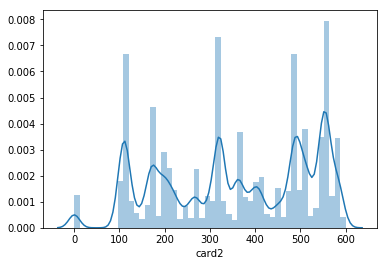

In [27]:
sns.distplot(train[train.columns[train.isnull().any()][0]].fillna(0),bins=50)

In [28]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3.429904e+06,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.000000e+00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,1.124662e+07,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,1.250000e+02,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,1.418400e+04,1.839600e+04
card2,581607.0,3.625555e+02,1.577932e+02,100.000,214.000,361.000,5.120000e+02,6.000000e+02
card3,588975.0,1.531949e+02,1.133644e+01,100.000,150.000,150.000,1.500000e+02,2.310000e+02
card5,586281.0,1.992789e+02,4.124445e+01,100.000,166.000,226.000,2.260000e+02,2.370000e+02
addr1,524834.0,2.907338e+02,1.017411e+02,100.000,204.000,299.000,3.300000e+02,5.400000e+02
addr2,524834.0,8.680063e+01,2.690623e+00,10.000,87.000,87.000,8.700000e+01,1.020000e+02


In [29]:
train[train.columns[train.isnull().any()][3]].describe()

count    586281.000000
mean        199.278897
std          41.244453
min         100.000000
25%         166.000000
50%         226.000000
75%         226.000000
max         237.000000
Name: card5, dtype: float64

In [30]:
#sns.distplot(train[train.columns[train.isnull().any()][3]].fillna("others"))

In [31]:
# from sklearn.preprocessing import Imputer
# # fill missing values with mean column values
# values = train.values
# imputer = Imputer()
# transformed_values = imputer.fit_transform(values)
# # count the number of NaN values in each column
# print(numpy.isnan(transformed_values).sum())

In [32]:
train.shape

(590540, 226)

In [33]:
%%time
for key in categorical_columns.keys():
    if(train[key].isnull().sum()<=10000):
        train.dropna(subset=[key],inplace=True)

Wall time: 20.4 s


In [34]:
train.shape

(587517, 226)

In [35]:
train.isnull().sum().sort_values(ascending=False).head()

dist1    349945
M5       348853
M7       345105
M8       345092
M9       345092
dtype: int64

# Filling Missing values with simple Median for now.Will Explore more options later

In [36]:
%%time
problamatic_columns=[]
for col in train.columns[train.isnull().any()]:
    try:
        train[col].fillna(train[col].median(),inplace=True)
    except:
        problamatic_columns.append(col)

Wall time: 2.85 s


In [37]:
train.columns[train.isnull().any()]

Index(['P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'], dtype='object')

In [38]:
problamatic_columns

['P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

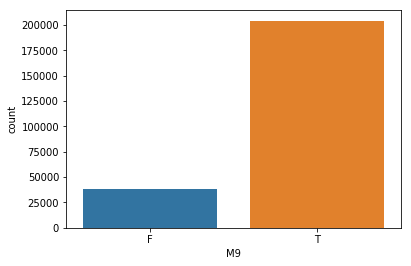

In [39]:
sns.countplot(x="M9",data=train)

In [40]:
train.drop(columns=problamatic_columns,inplace=True)

In [41]:
train.groupby('isFraud').size()

isFraud
0    566955
1     20562
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler,PolynomialFeatures

In [44]:
X=train.iloc[:,2:]
y=train.iloc[:,1]

In [45]:
encoder=LabelEncoder()

In [46]:
X['ProductCD']=encoder.fit_transform(X['ProductCD'])
X['card4']=encoder.fit_transform(X['card4'])
X['card6']=encoder.fit_transform(X['card6'])

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7)

In [48]:
from lightgbm import LGBMClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [50]:
#rf=RandomForestClassifier(n_estimators=100)
rf=LGBMClassifier(learning_rate=0.01,n_estimators=100,num_leaves=20,random_state=42,reg_alpha=0.5)

In [51]:
%%time
rf.fit(X_train,y_train)

Wall time: 6.13 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=20, objective=None,
        random_state=42, reg_alpha=0.5, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [52]:
predictions=rf.predict(X_test)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,roc_auc_score,roc_curve

In [54]:
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("ROC score : ",roc_auc_score(y_test,predictions))

Precision :  0.9259117082533589
Recall :  0.1674651114351177
[[396666    193]
 [ 11991   2412]]
ROC score :  0.5834893963082977


In [55]:
%%time
test_identity=pd.read_csv("test_identity.csv")
test_transaction=pd.read_csv("test_transaction.csv")

Wall time: 19.2 s


In [56]:
%%time
test=test_transaction.merge(test_identity,how="left",on="TransactionID")

Wall time: 6.92 s


In [57]:
temp_list=list(X.columns)

In [58]:
temp_list.append("TransactionID")

In [59]:
test.shape

(506691, 433)

In [60]:
test=test[temp_list]

In [61]:
test.shape

(506691, 215)

In [62]:
#Number of columns with null rows
len(test.columns[test.isnull().any()])

167

In [63]:
# test.V1.fillna(value=1,inplace=True)
# test.V14.fillna(value=1,inplace=True)
# test.V27.fillna(value=0,inplace=True)
# test.V28.fillna(value=0,inplace=True)
# test.V41.fillna(value=1,inplace=True)
# test.V65.fillna(value=1,inplace=True)
# test.V68.fillna(value=0,inplace=True)
# test.V88.fillna(value=1,inplace=True)
# test.V89.fillna(value=0,inplace=True)
# test.V107.fillna(value=1,inplace=True)
# test.V305.fillna(value=1,inplace=True)

In [64]:
#Number of columns with null rows
len(test.columns[test.isnull().any()])

167

In [65]:
%%time
problamatic_columns=[]
for col in test.columns[test.isnull().any()]:
    try:
        test[col].fillna(test[col].median(),inplace=True)
    except:
        problamatic_columns.append(col)

Wall time: 6.68 s


In [66]:
test.columns[test.isnull().any()]

Index(['card4', 'card6'], dtype='object')

In [67]:
test=process_df(test)

In [68]:
#test.card4.fillna("others",inplace=True)

In [69]:
#test.card6.fillna("debit",inplace=True)

In [68]:
test.columns[test.isnull().any()]

Index(['card4', 'card6'], dtype='object')

In [71]:
test['ProductCD']=encoder.fit_transform(test['ProductCD'])

In [72]:
test['card4']=encoder.fit_transform(test['card4'])


In [73]:
test["card6"].unique()

array(['debit', 'credit', 'charge card'], dtype=object)

In [74]:
test['card6']=encoder.fit_transform(test['card6'])

In [75]:
%%time
test_prediction=rf.predict_proba(test[X.columns])

Wall time: 3.95 s


In [76]:
test["isFraud"]=test_prediction[:,1]

In [77]:
test[["TransactionID","isFraud"]].to_csv("./submissions/submission_Jul27.csv",index=False)

In [78]:
from xgboost import XGBClassifier

In [103]:
xgb=XGBClassifier(random_state=42,silent=False,max_depth=12)

In [104]:
%%time
xgb.fit(X_train,y_train)

[02:09:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=12
[02:09:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 740 extra nodes, 0 pruned nodes, max_depth=12
[02:09:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=12
[02:09:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 810 extra nodes, 0 pruned nodes, max_depth=12
[02:09:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=12
[02:09:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 872 extra nodes, 0 pruned nodes, max_depth=12
[02:09:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tr

[02:12:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1044 extra nodes, 0 pruned nodes, max_depth=12
[02:12:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 608 extra nodes, 0 pruned nodes, max_depth=12
[02:12:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=12
[02:12:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 0 pruned nodes, max_depth=12
[02:12:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=12
[02:12:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 694 extra nodes, 0 pruned nodes, max_depth=12
[02:12:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: t

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [105]:
predictions=xgb.predict(X_test)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [106]:
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("ROC score : ",roc_auc_score(y_test,predictions))

Precision :  0.9220441156322784
Recall :  0.4679460436656932
[[396320    569]
 [  7652   6730]]
ROC score :  0.7332561967255748


In [107]:
test_prediction=xgb.predict_proba(test[X.columns])

In [108]:
test["isFraud"]=test_prediction[:,1]

In [109]:
test[["TransactionID","isFraud"]].to_csv("./submissions/submission_Jul27.csv",index=False)